In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [13]:
vumonic_data = pd.read_csv("datasets/vumonic_data.csv")

In [14]:
vumonic_data.head()

,user_code,transaction_code,product_seq,ordered_on,category,cat0fk,cat0,brand,product_name,unit_price,...,image,country_code,district,district_grp,state,zone,metro,tier,postal_code_base,tier_base
0,csi116xw,AM-00000000116XCSI0,1,2020-02-19 17:37:12+00:00,mobile accessory,Electronics,Electronics,NaN,(Renewed) OnePlus Bullets Wireless 2 (Black),3200.0,...,https://images-na.ssl-images-amazon.com/images...,in,muzaffarnagar,muzaffarnagar,uttar pradesh,north,no,tier3,110008,tier1
1,ct70dgb9,AM-000000000DGBCT71,1,2019-10-08 17:25:49+00:00,mobile accessory,Electronics,Electronics,cable hunter,Cable Hunter USB 3.1 5Gbps Type C Card Reader,434.0,...,https://images-na.ssl-images-amazon.com/images...,in,chennai,chennai,tamil nadu,south,yes,tier1,600004,tier1
2,ct70dgb9,AM-000000000DGBCT71,2,2019-10-08 17:25:49+00:00,men footwear,LifeStyle,Apparel & Accessories,red tape,Red Tape Men's RTE1183 Tan Leather Formal Shoe...,1473.0,...,https://images-na.ssl-images-amazon.com/images...,in,chennai,chennai,tamil nadu,south,yes,tier1,600004,tier1
3,ct70dgb9,AM-000000000DGBCT71,3,2019-10-08 17:25:49+00:00,"memory card, pen drive",Electronics,Electronics,strontium,Strontium Nitro A1 32GB Micro SDHC Memory Card...,299.0,...,https://images-na.ssl-images-amazon.com/images...,in,chennai,chennai,tamil nadu,south,yes,tier1,600004,tier1
4,ct70dgb9,AM-000000000DGBCT72,1,2019-10-08 18:11:21+00:00,inverter,BGM,Office Supplies,NaN,World Map,98.0,...,https://images-na.ssl-images-amazon.com/images...,in,chennai,chennai,tamil nadu,south,yes,tier1,600004,tier1


In [32]:
amazon = vumonic_data.loc[vumonic_data["platform"] == "amazon"] #amazon data df

In [33]:
amazon_samp = amazon.sample(n = 111051, replace = False) #taking a sample of data so the size of the data is same for amazon and flipkart

In [34]:
amazon_samp["num_of_purch"] = 1

In [35]:
#amazon_samp = amazon_samp.groupby("user_code").sum().sort_values("num_of_purch", ascending = False) #how many purchases each customer did 

In [36]:
amazon_samp.head()

,user_code,transaction_code,product_seq,ordered_on,category,cat0fk,cat0,brand,product_name,unit_price,...,country_code,district,district_grp,state,zone,metro,tier,postal_code_base,tier_base,num_of_purch
100679,crw0apxb,AM-00000APX21084184,5,2019-11-06 08:41:10+00:00,"dal, pulse",BGM,"Food, Beverages & Tobacco",tata sampann,"Tata Sampann Kala Chana, 1kg",209.0,...,in,thane,mumbai mpr,maharashtra,west,yes,tier1,400071,tier1,1
22619,crspte2o,AM-0000PTE2RSP18816,1,2019-10-22 11:20:26+00:00,craft material,BGM,Arts & Entertainment,camel,"Camel Kokuyo Artists Fixative Spray, 200ml",250.0,...,in,central delhi,delhi ncr,delhi,north,yes,tier1,110008,tier1,1
86235,crpe6f03,AM-0000E6F080671977,2,2020-01-09 00:09:14+00:00,"skin, face care",BGM,Health & Beauty,speaking tree,Speaking Tree Exfoliating Coffee Handmade Soap...,160.0,...,in,salem,salem,tamil nadu,south,no,tier3,NaN,NaN,1
72427,cs9zg41w,AM-0000ZG4153160333,1,2020-01-13 04:27:39+00:00,cookware,Home,Home & Garden,cello,Cello Non-Stick 12 Cavity Appam Patra with Sta...,549.0,...,in,ahmedabad,ahmedabad,gujarat,west,yes,tier1,NaN,NaN,1
37823,ct02lbuk,AM-00002LBU13931389,2,2020-01-28 23:27:30+00:00,~others,BGM,Baby & Toddler,syga,SYGA Manual Breast Pump with Feeding Nipple,299.0,...,in,krishna,krishna,andhra pradesh,south,yes,tier2,500001,tier1,1


In [37]:
amazon_samp = amazon_samp.sort_values(by="ordered_on", ascending=False)

In [39]:
amazon["state"].value_counts() #how many orders there where from each state

maharashtra                  22010
karnataka                    15819
uttar pradesh                13134
tamil nadu                   12352
telangana                    10047
west bengal                   9649
delhi                         9116
gujarat                       7595
andhra pradesh                6919
haryana                       6020
rajasthan                     5604
madhya pradesh                4061
bihar                         4026
odisha                        3527
kerala                        3386
punjab                        3224
jharkhand                     2101
assam                         1835
uttarakhand                   1494
chattisgarh                   1264
himachal pradesh               743
goa                            589
jammu & kashmir                467
chandigarh                     411
manipur                        338
tripura                        269
meghalaya                      240
pondicherry                    215
nagaland            

In [23]:
flipkart = vumonic_data.loc[vumonic_data["platform"] == "flipkart"] #flipkart transaction data

In [26]:
flipkart = flipkart.sort_values(by="ordered_on", ascending=False) #finding the first order

In [28]:
flipkart.head()

,user_code,transaction_code,product_seq,ordered_on,category,cat0fk,cat0,brand,product_name,unit_price,...,image,country_code,district,district_grp,state,zone,metro,tier,postal_code_base,tier_base
258393,cse731if,FL-0000731I85077554,1,2020-03-29 06:33:05+00:00,household cleaner,Home,Home & Garden,pigeon,Pigeon Enjoy Mop Mop,799.0,...,http://img.fkcdn.com/image/100/100/j6mhxu80/mo...,in,central delhi,delhi ncr,delhi,north,yes,tier1,110001,tier1
258392,cs6m878f,FL-0000M87876277553,1,2020-03-29 05:25:46+00:00,"hand, foot care",BGM,Apparel & Accessories,agaro,Agaro 33168 Foot Massager,3999.0,...,http://img.fkcdn.com/image/100/100/k3orqfk0/ma...,in,central delhi,delhi ncr,delhi,north,yes,tier1,110054,tier1
258391,csd0htug,FL-00000HTU71477552,1,2020-03-26 20:15:00+00:00,pet food,Home,Animals & Pet Supplies,whiskas,Whiskas Adult (+1 year) Mackeral 3 kg Dry Cat ...,840.0,...,http://img.fkcdn.com/image/100/100/jj6130w0/pe...,in,new delhi,delhi ncr,delhi,north,yes,tier1,110003,tier1
258378,csqwmbh3,FL-0000WMBH59177551,12,2020-03-26 15:25:02+00:00,"noodle, pasta, vermicelli",BGM,"Food, Beverages & Tobacco",yippee,Yippee Cheese Treat Pasta,75.0,...,http://img.fkcdn.com/image/100/100/k6ci8i80/pa...,in,south east delhi,delhi ncr,delhi,north,yes,tier1,110001,tier1
258390,csqwmbh3,FL-0000WMBH59177551,24,2020-03-26 15:25:02+00:00,"noodle, pasta, vermicelli",BGM,"Food, Beverages & Tobacco",yippee,Yippee Cheese Treat Pasta,75.0,...,http://img.fkcdn.com/image/100/100/k6ci8i80/pa...,in,south east delhi,delhi ncr,delhi,north,yes,tier1,110001,tier1


In [479]:
len(flipkart)

111051

In [480]:
len(amazon)

147343

In [29]:
amazon["category"].value_counts() #how many orders there were from each category

~others                              16825
mobile accessory                     12417
audio, video accessory                8799
men clothing                          6388
skin, face care                       5878
book                                  4218
mobile phone                          3964
women clothing                        3258
men footwear                          3235
home storage, organizer               2341
hair oil, gel, serum                  2336
personal care appliance               2303
kid footwear                          2210
jewellery                             1945
health drink supplement               1800
toilet soap, liquid                   1720
bedding, curtain, carpet, cushion     1652
wrist watch                           1614
wearable smart device                 1611
tableware, dinnerware                 1598
baby diaper                           1558
kitchen tool                          1398
household cleaner                     1372
memory card

In [482]:
flipkart["category"].value_counts()

mobile accessory                     8930
~others                              8401
men clothing                         8134
memory card, pen drive               4995
audio, video accessory               4916
men footwear                         4304
women clothing                       4044
skin, face care                      3255
wrist watch                          2762
book                                 2704
edible oil, ghee, vanaspati          2105
personal care appliance              1954
fragrance, perfume, deo              1937
tablet                               1835
bedding, curtain, carpet, cushion    1777
dal, pulse                           1536
power bank                           1458
security camera, system              1227
hair oil, gel, serum                 1216
baby diaper                          1049
mobile charger                        993
spice                                 974
laptop                                964
dry fruit, nut                    

In [30]:
list(flipkart["ordered_on"])[0] #first order

'2020-03-29 06:33:05+00:00'

In [41]:
amazon_samp["order_date"] = pd.to_datetime(amazon_samp["ordered_on"]) #changing ordered on column to datetime

In [42]:
amazon_samp["order_week"] = amazon_samp["order_date"].dt.strftime('%y-%U') #creating column that has the week of each order 

In [43]:
flipkart["order_date"] = pd.to_datetime(flipkart["ordered_on"])

In [44]:
flipkart["order_week"] = flipkart["order_date"].dt.strftime('%y-%U')

In [45]:
flipkart.head()

,user_code,transaction_code,product_seq,ordered_on,category,cat0fk,cat0,brand,product_name,unit_price,...,district,district_grp,state,zone,metro,tier,postal_code_base,tier_base,order_date,order_week
258393,cse731if,FL-0000731I85077554,1,2020-03-29 06:33:05+00:00,household cleaner,Home,Home & Garden,pigeon,Pigeon Enjoy Mop Mop,799.0,...,central delhi,delhi ncr,delhi,north,yes,tier1,110001,tier1,2020-03-29 06:33:05+00:00,20-13
258392,cs6m878f,FL-0000M87876277553,1,2020-03-29 05:25:46+00:00,"hand, foot care",BGM,Apparel & Accessories,agaro,Agaro 33168 Foot Massager,3999.0,...,central delhi,delhi ncr,delhi,north,yes,tier1,110054,tier1,2020-03-29 05:25:46+00:00,20-13
258391,csd0htug,FL-00000HTU71477552,1,2020-03-26 20:15:00+00:00,pet food,Home,Animals & Pet Supplies,whiskas,Whiskas Adult (+1 year) Mackeral 3 kg Dry Cat ...,840.0,...,new delhi,delhi ncr,delhi,north,yes,tier1,110003,tier1,2020-03-26 20:15:00+00:00,20-12
258378,csqwmbh3,FL-0000WMBH59177551,12,2020-03-26 15:25:02+00:00,"noodle, pasta, vermicelli",BGM,"Food, Beverages & Tobacco",yippee,Yippee Cheese Treat Pasta,75.0,...,south east delhi,delhi ncr,delhi,north,yes,tier1,110001,tier1,2020-03-26 15:25:02+00:00,20-12
258390,csqwmbh3,FL-0000WMBH59177551,24,2020-03-26 15:25:02+00:00,"noodle, pasta, vermicelli",BGM,"Food, Beverages & Tobacco",yippee,Yippee Cheese Treat Pasta,75.0,...,south east delhi,delhi ncr,delhi,north,yes,tier1,110001,tier1,2020-03-26 15:25:02+00:00,20-12


In [46]:
amazon_by_week = amazon_samp.groupby("order_week").sum()[["amount_transaction", "quantity"]] #grouping orders by week

In [47]:
amazon_max_amount = amazon_by_week["amount_transaction"].max()

In [48]:
amazon_max_amount #max transaction from amazon

15907104.939999951

In [56]:
def convert_amount(amount): #convert the purchase amounts based on the max transaction
    val = amount * 100 / amazon_max_amount
    return val

In [57]:
amazon_by_week["converted_amount"] = amazon_by_week["amount_transaction"].apply(convert_amount)

In [58]:
amazon_by_week["week"] = amazon_by_week.index

In [59]:
amazon_by_week.head()

,amount_transaction,quantity,converted_amount,week
order_week,,,,
19-39,15907104.94,8364,100.000000,19-39
19-40,5730714.89,4711,36.026134,19-40
19-41,13226756.24,8914,83.149990,19-41
19-42,14610436.52,7623,91.848495,19-42
19-43,4529456.41,4078,28.474423,19-43


In [60]:
def convert_amount(amount): #convert the purchase amounts based on the max transaction
    val = amount * 100 / flipkart_max_amount
    return val

In [61]:
flipkart_by_week = flipkart.groupby("order_week").sum()[["amount_transaction", "quantity"]]

In [62]:
flipkart_max_amount = flipkart_by_week["amount_transaction"].max()

In [65]:
flipkart_max_amount 

61781156.0

In [66]:
flipkart_by_week["converted_amount"] = flipkart_by_week["amount_transaction"].apply(convert_amount)

In [67]:
flipkart_by_week["week"] = flipkart_by_week.index

In [68]:
flipkart_by_week.head()

,amount_transaction,quantity,converted_amount,week
order_week,,,,
19-39,61781156.0,15562,100.000000,19-39
19-40,12953538.0,5322,20.966811,19-40
19-41,18702932.0,6605,30.272875,19-41
19-42,22977306.0,8252,37.191447,19-42
19-43,8365123.0,4076,13.539926,19-43


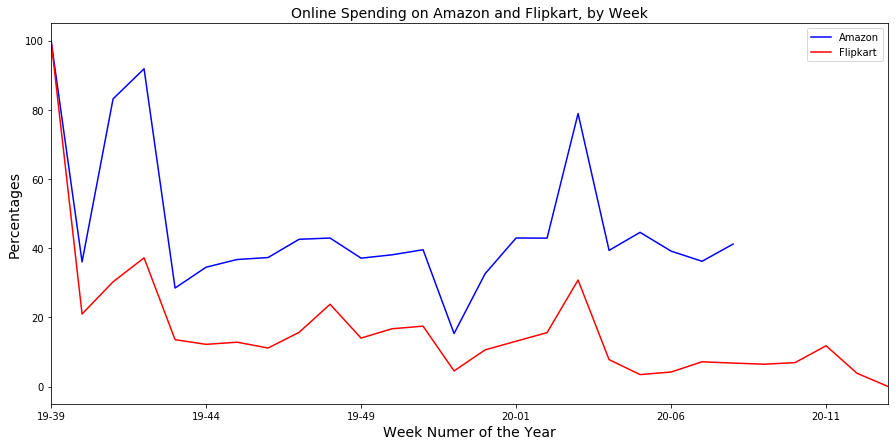

In [69]:
fig, ax = plt.subplots(figsize=(15,7)) #transactions by week based on the converted amounts
amazon_by_week.plot("week", "converted_amount", style = 'b-', ax = ax)
flipkart_by_week.plot("week", "converted_amount", style = 'r-', ax = ax)
plt.title("Online Spending on Amazon and Flipkart, by Week", fontsize = 14)
plt.ylabel("Percentages", fontsize = 14)
plt.xlabel("Week Numer of the Year", fontsize = 14)
plt.legend(loc = "upper right", labels = ["Amazon", "Flipkart"])

In [1217]:
#Creating a plot about districts

In [70]:
ama = amazon.loc[:,["cat0", "ordered_on", "amount_transaction", "state", "quantity"]] #choosing the columns needed for the plot

In [71]:
amazon_dis = ama.groupby("state").sum() #sum of transactions in each state

In [72]:
amazon_dis = amazon_dis.sort_index()

In [73]:
amazon_dis.head()

,amount_transaction,quantity
state,,
andaman & nicobar islands,151683.00,25
andhra pradesh,10403410.00,7355
arunachal pradesh,56276.09,45
assam,2559764.31,1971
bihar,5721517.15,4345


In [76]:
amazon_trans_sum = amazon_dis["amount_transaction"].sum()

In [77]:
def a_per_tran(amount): #converting the amount based on the sum of all transactions
    per = float(amount)*100/amazon_trans_sum
    return per

In [78]:
amazon_dis["percentage_transaction"] = amazon_dis["amount_transaction"].apply(a_per_tran)

In [79]:
amazon_dis_final = amazon_dis.sort_values(by = "percentage_transaction", ascending = False).reset_index().head(10)

In [80]:
flip = flipkart.loc[:,["cat0", "ordered_on", "amount_transaction", "state"]]
flipkart_dis= flip.groupby("state").sum()
flipkart["state"].value_counts()
flipkart_dis = flipkart_dis.sort_index()
flip_trans_sum = flipkart_dis["amount_transaction"].sum()

def f_per_tran(amount):
    per = float(amount)*100/flip_trans_sum
    return per

flipkart_dis["percentage_transaction"] = flipkart_dis["amount_transaction"].apply(f_per_tran)
flipkart_dis_final = flipkart_dis.sort_values(by = "percentage_transaction", ascending = False).reset_index().head(10)

Text(0.5, 6.79999999999999, 'States')

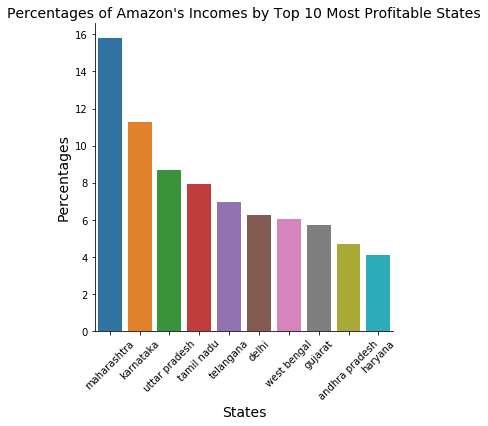

In [81]:
amazon_dis_chart = sns.catplot(x = "state", y = "percentage_transaction", kind = "bar", data = amazon_dis_final)
amazon_dis_chart.set_xticklabels(rotation=45)
plt.title("Percentages of Amazon's Incomes by Top 10 Most Profitable States", fontsize = 14)
plt.ylabel("Percentages", fontsize = 14)
plt.xlabel("States", fontsize = 14)

Text(0.5, 6.79999999999999, 'States')

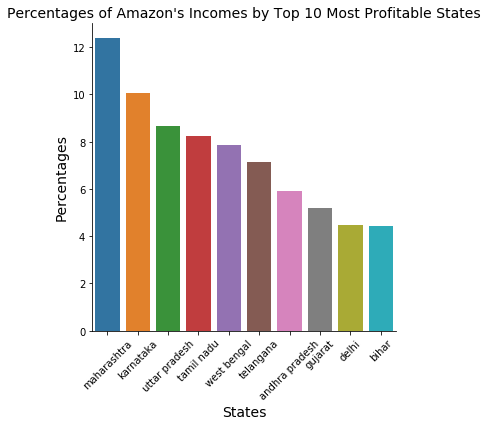

In [1249]:
flipkart_dis_chart = sns.catplot(x = "state", y = "percentage_transaction", kind = "bar", data = flipkart_dis_final)
flipkart_dis_chart.set_xticklabels(rotation=45)
plt.title("Percentages of Amazon's Incomes by Top 10 Most Profitable States", fontsize = 14)
plt.ylabel("Percentages", fontsize = 14)
plt.xlabel("States", fontsize = 14)

In [82]:
#Categories analysis

In [83]:
category_data = vumonic_data.loc[:, ["ordered_on", "platform", "amount_transaction", "quantity", "cat0"]] #choosig the categories needed for the analysis

In [508]:
category_data.head()

,ordered_on,platform,amount_transaction,quantity,cat0
0,2020-02-19 17:37:12+00:00,amazon,3065.0,1,Electronics
1,2019-10-08 17:25:49+00:00,amazon,434.0,1,Electronics
2,2019-10-08 17:25:49+00:00,amazon,1470.0,1,Apparel & Accessories
3,2019-10-08 17:25:49+00:00,amazon,299.0,1,Electronics
4,2019-10-08 18:11:21+00:00,amazon,98.0,1,Office Supplies


In [509]:
#Category distribution by quantity of orders 

In [510]:
amazon_cat = category_data.loc[category_data["platform"] == "amazon"]
amazon_by_cat = amazon_cat.groupby("cat0").sum()
amazon_by_cat = amazon_by_cat.sort_values(by = "quantity", ascending = False)

In [511]:
flipkart_cat = category_data.loc[category_data["platform"] == "flipkart"]
flipkart_by_cat = flipkart_cat.groupby("cat0").sum()
flipkart_by_cat = flipkart_by_cat.sort_values(by = "quantity", ascending = False)

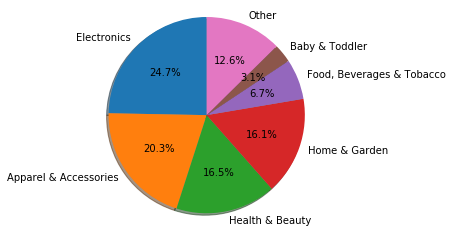

In [1054]:
a_cate = list(dict(amazon_by_cat["quantity"]).keys())[0:6] + ["Other"]
a_val = list(dict(amazon_by_cat["quantity"]).values())[0:6] + [(amazon_by_cat["quantity"].sum() - 137593)]

fig1, ax1 = plt.subplots()
ax1.pie(a_val, labels = a_cate, autopct = '%1.1f%%',shadow = True, startangle = 90)
ax1.axis('equal')

plt.show()

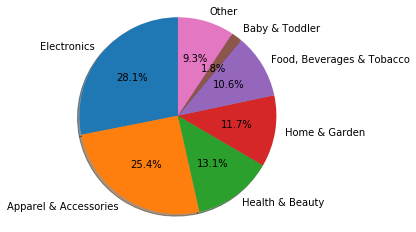

In [513]:
f_cate = list(dict(flipkart_by_cat["quantity"]).keys())[0:6] + ["Other"]
f_val = list(dict(flipkart_by_cat["quantity"]).values())[0:6] + [(flipkart_by_cat["quantity"].sum() - 104535)]

fig2, ax2 = plt.subplots()
ax2.pie(f_val, labels = f_cate, autopct = '%1.1f%%',shadow = True, startangle = 90)
ax2.axis('equal')

plt.show()

In [514]:
#Category distribution by transaction amounts

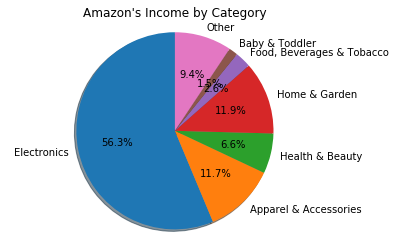

In [1056]:
a_cate_tran = list(dict(amazon_by_cat["amount_transaction"]).keys())[0:6] + ["Other"]
a_list = list(dict(amazon_by_cat["amount_transaction"]).values())[0:6]

sum_of_greatest = 0
for num in a_list:
    sum_of_greatest += num   
    
a_val_tran = list(dict(amazon_by_cat["amount_transaction"]).values())[0:6] + [(amazon_by_cat["amount_transaction"].sum() - sum_of_greatest)]

fig3, ax3 = plt.subplots()
ax3.pie(a_val_tran, labels = a_cate_tran, autopct = '%1.1f%%',shadow = True, startangle = 90)
ax3.axis('equal')
plt.title("Amazon's Income by Category")
plt.show()

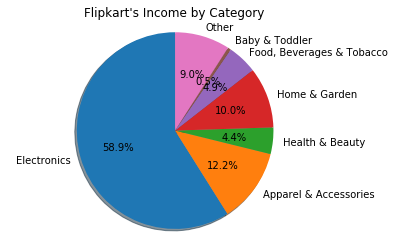

In [1057]:
f_cate_tran = list(dict(flipkart_by_cat["amount_transaction"]).keys())[0:6] + ["Other"]
f_list = list(dict(flipkart_by_cat["amount_transaction"]).values())[0:6]

sum_of_greatest = 0
for num in f_list:
    sum_of_greatest += num   
    
f_val_tran = list(dict(flipkart_by_cat["amount_transaction"]).values())[0:6] + [(flipkart_by_cat["amount_transaction"].sum() - sum_of_greatest)]

fig4, ax4 = plt.subplots()
ax4.pie(f_val_tran, labels = f_cate_tran, autopct = '%1.1f%%',shadow = True, startangle = 90)
ax4.axis('equal')
plt.title("Flipkart's Income by Category")
plt.show()

In [1058]:
#Income from selling electronics by week

In [518]:
adjusted_data = pd.read_csv("datasets/vumonic_data.csv", usecols = ['quantity','platform', "cat0", "amount_transaction", "ordered_on"], parse_dates=['ordered_on'])

In [519]:
amazon_2 = adjusted_data.loc[adjusted_data["platform"] == "amazon"]
flipkart_2 = adjusted_data.loc[adjusted_data["platform"] == "flipkart"]

amazon_elec = amazon_2.loc[adjusted_data["cat0"] == "Electronics"]
flipkart_elec = flipkart_2.loc[adjusted_data["cat0"] == "Electronics"]

In [520]:
amazon_elec.index = amazon_elec["ordered_on"]
amazon_elec = amazon_elec.resample("W").sum()
amazon_elec = amazon_elec.reset_index()

In [1060]:
amazon_elec["amount_transaction"].max()

14090394.999999916

In [1061]:
flipkart_elec["amount_transaction"].max()

41235592.0

In [1062]:
def trans_per(amount):
    return amount*100/flipkart_elec["amount_transaction"].max()

In [1063]:
amazon_elec["trans_per"] = amazon_elec["amount_transaction"].apply(trans_per)

In [1064]:
flipkart_elec.index = flipkart_elec["ordered_on"]
flipkart_elec = flipkart_elec.resample("W").sum()
flipkart_elec = flipkart_elec.reset_index()

In [1065]:
flipkart_elec.head()

,ordered_on,quantity,amount_transaction,trans_per
0,2019-10-06 00:00:00+00:00,6375,41235592.0,100.000000
1,2019-10-13 00:00:00+00:00,1977,9523912.0,23.096339
2,2019-10-20 00:00:00+00:00,2042,10533093.0,25.543693
3,2019-10-27 00:00:00+00:00,2491,13115005.0,31.805061
4,2019-11-03 00:00:00+00:00,1122,4903422.0,11.891237


In [1066]:
def trans_per_f(amount):
    return amount*100/flipkart_elec["amount_transaction"].max()

In [1067]:
flipkart_elec["trans_per"] = flipkart_elec["amount_transaction"].apply(trans_per_f)

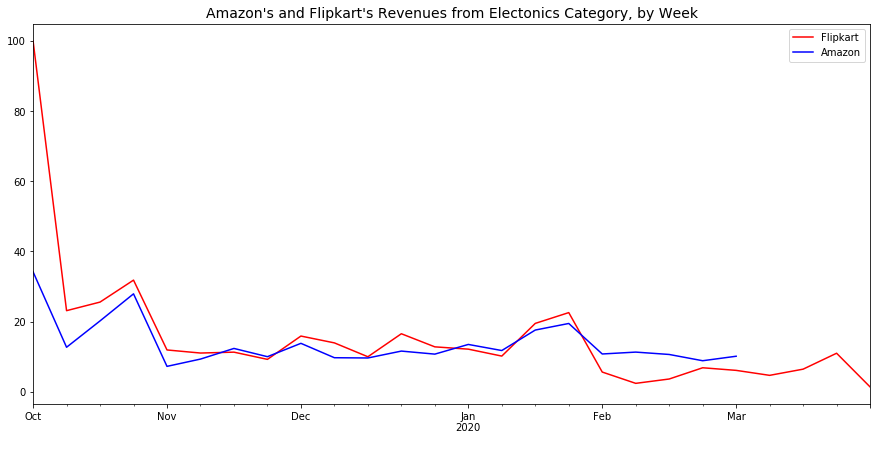

In [1257]:
fig, ax = plt.subplots(figsize=(15,7))
flipkart_elec.plot("ordered_on", "trans_per", style = 'r-', ax = ax)
amazon_elec.plot("ordered_on", "trans_per", style = 'b-', ax = ax)
plt.title("Amazon's and Flipkart's Revenues from Electonics Category, by Week", fontsize = 14)
plt.xlabel(" ")
plt.legend(loc = "upper right", labels = ["Flipkart", "Amazon"])
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [528]:
#Smaller category by tiers 1, 2 and 3

In [529]:
amazon_tier = amazon.copy()
flipkart_tier = flipkart.copy()

amazon_tier = amazon_tier.set_index("ordered_on")
flipkart_tier = flipkart_tier.set_index("ordered_on")

In [530]:
amazon_tier1["category"].value_counts().head(10)

~others                    7427
mobile accessory           4776
audio, video accessory     3587
men clothing               2686
skin, face care            2586
book                       1598
women clothing             1337
mobile phone               1306
men footwear               1159
home storage, organizer    1145
Name: category, dtype: int64

In [531]:
amazon_tier2["category"].value_counts().head(10)

~others                    2058
mobile accessory           1528
audio, video accessory     1233
men clothing                877
skin, face care             827
book                        644
mobile phone                612
women clothing              468
men footwear                450
personal care appliance     358
Name: category, dtype: int64

In [532]:
amazon_tier3["category"].value_counts().head(10)

~others                   7319
mobile accessory          6103
audio, video accessory    3972
men clothing              2817
skin, face care           2460
mobile phone              2042
book                      1969
men footwear              1625
women clothing            1452
kid footwear              1097
Name: category, dtype: int64

In [533]:
#flipkart_elec = flipkart_elec.resample("W").sum()
#amazon_tier1.loc[amazon_tier1["category"] == "mobile accessory"].resample("W").sum()

In [1184]:
amazon_tier1 = amazon_tier.loc[amazon_tier["tier"] == "tier1"]
amazon_tier2 = amazon_tier.loc[amazon_tier["tier"] == "tier2"]
amazon_tier3 = amazon_tier.loc[amazon_tier["tier"] == "tier3"]

flipkart_tier1 = flipkart_tier.loc[flipkart_tier["tier"] == "tier1"]
flipkart_tier2 = flipkart_tier.loc[flipkart_tier["tier"] == "tier2"]
flipkart_tier3 = flipkart_tier.loc[flipkart_tier["tier"] == "tier3"]

In [535]:
#Mobile accessory tier 1 

In [1185]:
amazon_tier1_mob = amazon_tier1.loc[amazon_tier1["category"] == "mobile accessory"]
amazon_tier1_mob.index = pd.to_datetime(amazon_tier1_mob.index)
amazon_tier1_mob = amazon_tier1_mob.resample("W").sum()

flip_tier1_mob = flipkart_tier1.loc[flipkart_tier1["category"] == "mobile accessory"]
flip_tier1_mob.index = pd.to_datetime(flip_tier1_mob.index)
flip_tier1_mob = flip_tier1_mob.resample("W").sum()

In [537]:
def amazon_per_mob1(amount):
    return amount*100/amazon_tier1_mob["amount_transaction"].max()

def flipkart_per_mob1(amount):
    return amount*100/flip_tier1_mob["amount_transaction"].max()

In [1189]:
amazon_tier1_mob["trans_per"] = amazon_tier1_mob["amount_transaction"].apply(flipkart_per_mob1)
flip_tier1_mob["trans_per"] = flip_tier1_mob["amount_transaction"].apply(flipkart_per_mob1)

amazon_tier1_mob = amazon_tier1_mob.reset_index()
flip_tier1_mob = flip_tier1_mob.reset_index()

//anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


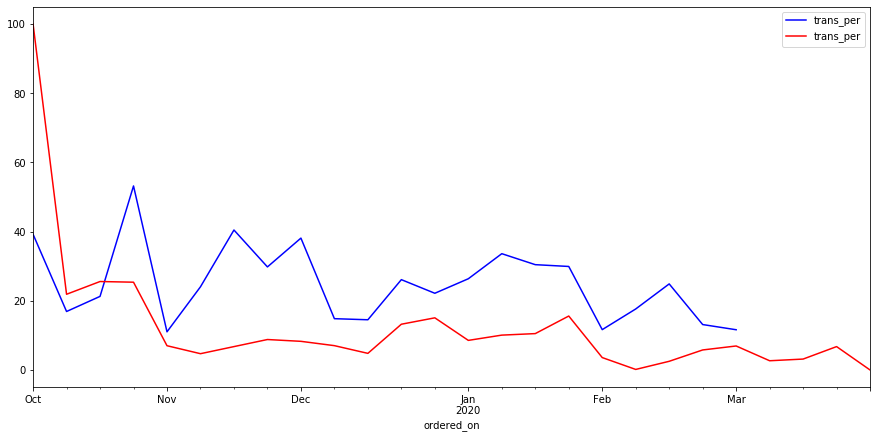

In [1190]:
fig, ax = plt.subplots(figsize=(15,7))
amazon_tier1_mob.plot("ordered_on", "trans_per", style = 'b-', ax = ax)
flip_tier1_mob.plot("ordered_on", "trans_per", style = 'r-', ax = ax)

In [540]:
#Mobile accessory tier 2

In [541]:
amazon_tier2_mob = amazon_tier2.loc[amazon_tier2["category"] == "mobile accessory"]
amazon_tier2_mob.index = pd.to_datetime(amazon_tier2_mob.index)
amazon_tier2_mob = amazon_tier2_mob.resample("W").sum()

flip_tier2_mob = flipkart_tier2.loc[flipkart_tier2["category"] == "mobile accessory"]
flip_tier2_mob.index = pd.to_datetime(flip_tier2_mob.index)
flip_tier2_mob = flip_tier2_mob.resample("W").sum()

In [542]:
def amazon_per_mob2(amount):
    return amount*100/amazon_tier2_mob["amount_transaction"].max()

def flipkart_per_mob2(amount):
    return amount*100/flip_tier2_mob["amount_transaction"].max()

In [1193]:
amazon_tier2_mob["trans_per"] = amazon_tier2_mob["amount_transaction"].apply(flipkart_per_mob2)
flip_tier2_mob["trans_per"] = flip_tier2_mob["amount_transaction"].apply(flipkart_per_mob2)

amazon_tier2_mob = amazon_tier2_mob.reset_index()
flip_tier2_mob = flip_tier2_mob.reset_index()

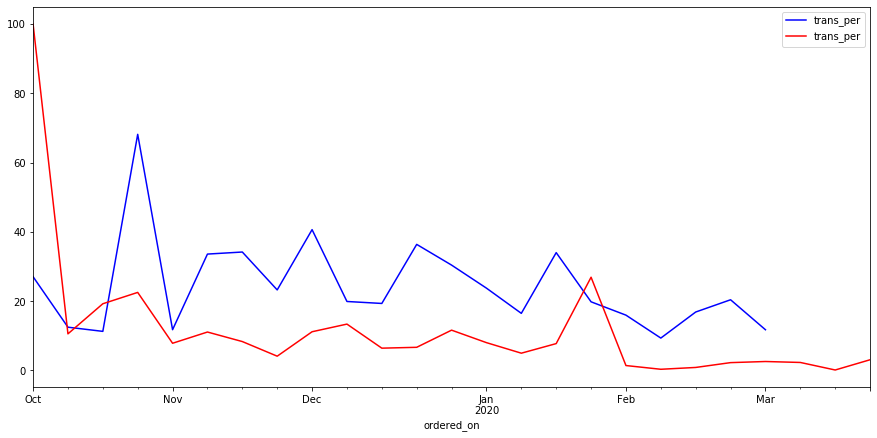

In [1194]:
fig, ax = plt.subplots(figsize=(15,7))
amazon_tier2_mob.plot("ordered_on", "trans_per", style = 'b-', ax = ax)
flip_tier2_mob.plot("ordered_on", "trans_per", style = 'r-', ax = ax)

In [545]:
#Mobile accessury tier 3 

In [546]:
amazon_tier3_mob = amazon_tier3.loc[amazon_tier3["category"] == "mobile accessory"]
amazon_tier3_mob.index = pd.to_datetime(amazon_tier3_mob.index)
amazon_tier3_mob = amazon_tier3_mob.resample("W").sum()

flip_tier3_mob = flipkart_tier3.loc[flipkart_tier3["category"] == "mobile accessory"]
flip_tier3_mob.index = pd.to_datetime(flip_tier3_mob.index)
flip_tier3_mob = flip_tier3_mob.resample("W").sum()

In [547]:
def amazon_per_mob3(amount):
    return amount*100/amazon_tier3_mob["amount_transaction"].max()

def flipkart_per_mob3(amount):
    return amount*100/flip_tier3_mob["amount_transaction"].max()

In [1195]:
amazon_tier3_mob["trans_per"] = amazon_tier3_mob["amount_transaction"].apply(flipkart_per_mob3)
flip_tier3_mob["trans_per"] = flip_tier3_mob["amount_transaction"].apply(flipkart_per_mob3)

amazon_tier3_mob = amazon_tier3_mob.reset_index()
flip_tier3_mob = flip_tier3_mob.reset_index()

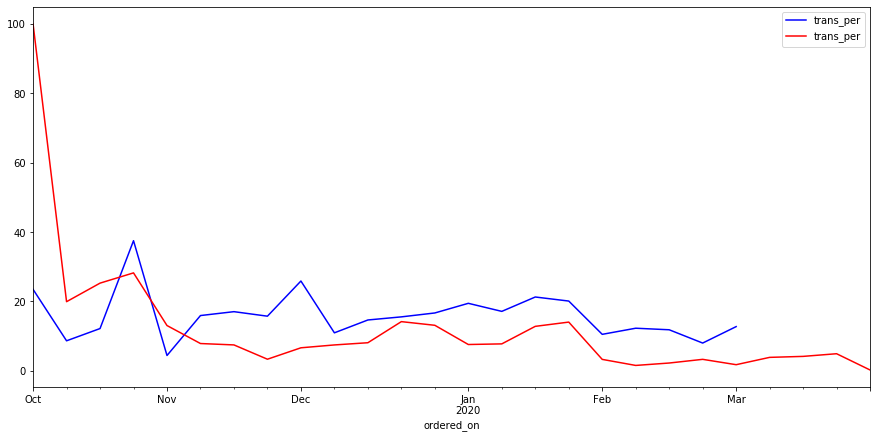

In [1196]:
fig, ax = plt.subplots(figsize=(15,7))
amazon_tier3_mob.plot("ordered_on", "trans_per", style = 'b-', ax = ax)
flip_tier3_mob.plot("ordered_on", "trans_per", style = 'r-', ax = ax)

In [550]:
#Mean transaction amount by category

In [551]:
amazon_tran_cat = amazon.groupby("cat0").mean()
amazon_tran_cat = amazon_tran_cat.sort_values(by = "amount", ascending = False)
amazon_tran_cat = amazon_tran_cat.reset_index()

In [552]:
amazon_tran_cat.head(10)

,cat0,product_seq,unit_price,amount,quantity,postal_code,amount_transaction
0,Electronics,1.115418,3323.263776,3344.140788,1.023210,465830.992809,3285.633451
1,Cameras & Optics,1.143713,2944.588578,3177.525704,1.032186,477918.856712,3142.806370
2,Furniture,1.221239,1779.546618,1853.700993,1.054081,454546.762045,1800.657414
3,Luggage & Bags,1.170513,1113.972654,1146.292739,1.029060,460917.960650,1266.803090
4,Home & Garden,1.455335,948.547770,987.524535,1.087321,453812.758687,1133.040522
5,Animals & Pet Supplies,1.255580,898.886213,955.124514,1.116631,460496.591499,1034.180583
6,Hardware,1.228119,850.939777,894.808473,1.058659,474645.555037,1111.156043
7,Software,1.215223,854.876168,865.603202,1.017060,459506.475690,1066.806457
8,Apparel & Accessories,1.285522,685.941984,697.864822,1.028135,455258.414941,832.589527
9,Baby & Toddler,1.286011,626.183340,668.460810,1.109880,468093.882367,754.445757


In [553]:
flip_tran_cat = flipkart.groupby("cat0").mean()
flip_tran_cat = flip_tran_cat.sort_values(by = "amount", ascending = False)
flip_tran_cat = flip_tran_cat.reset_index()

In [554]:
flip_tran_cat.head(10)

,cat0,product_seq,unit_price,amount,quantity,postal_code,amount_transaction
0,Cameras & Optics,1.265330,7698.133255,7820.357311,1.018868,514790.765330,7892.854953
1,Electronics,1.261851,4826.995963,4916.756379,1.021479,509127.508787,5266.573348
2,Furniture,1.506557,2553.080328,2599.696721,1.021311,503332.234426,3853.368852
3,Home & Garden,2.067789,1278.997248,1354.980733,1.064486,497693.686447,2231.997877
4,Luggage & Bags,1.355411,981.162034,1016.710231,1.017741,511822.197750,1628.986399
5,Software,1.542294,925.727694,935.975666,1.016222,480233.349942,9346.469293
6,Hardware,1.471781,771.643739,833.809524,1.075838,520855.263668,1340.293651
7,Vehicles & Parts,1.356436,636.612961,728.886589,1.048605,518198.333033,910.654365
8,Apparel & Accessories,1.601526,660.342380,679.385304,1.020417,506116.267120,1206.499965
9,Sporting Goods,1.342105,634.142105,667.510526,1.073684,494502.221053,933.326316


In [555]:
ama_categories = list(amazon_tran_cat["cat0"])
ama_cat_amount = list(amazon_tran_cat["amount"])

flip_categories = list(flip_tran_cat["cat0"])
flip_cat_amount = list(flip_tran_cat["amount"])

Text(0, 0.5, 'Rupees')

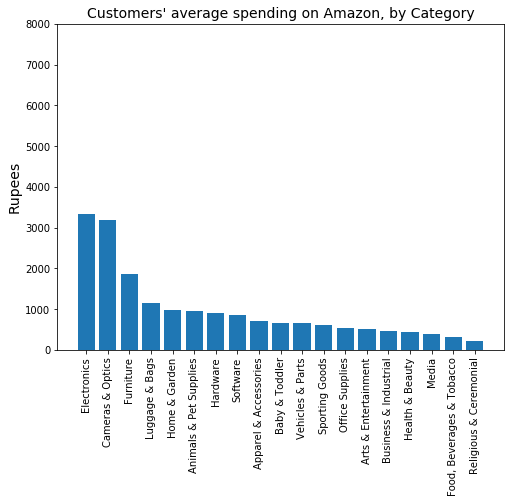

In [1075]:
plt.subplots(figsize=(8, 6))
plt.bar(ama_categories, ama_cat_amount)
plt.xticks(ama_categories, rotation=90)
plt.yticks(np.arange(0, 9000, 1000))
plt.title("Customers' average spending on Amazon, by Category", fontsize = 14)
plt.ylabel("Rupees", fontsize = 14)

Text(0, 0.5, 'Rupees')

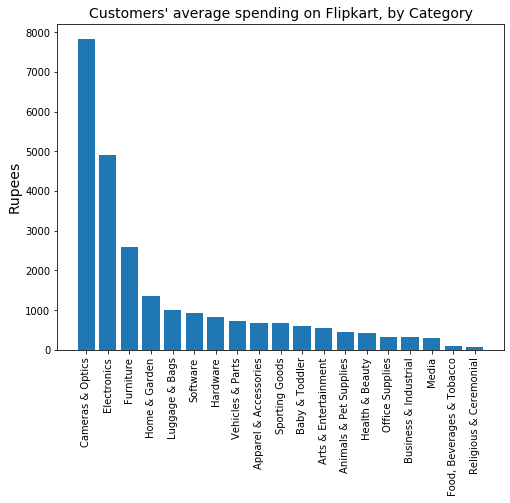

In [1250]:
plt.subplots(figsize=(8, 6))
plt.bar(flip_categories, flip_cat_amount)
plt.xticks(flip_categories, rotation=90)
plt.title("Customers' average spending on Flipkart, by Category", fontsize = 14)
plt.ylabel("Rupees", fontsize = 14)

In [1203]:
f_optics = flipkart.loc[flipkart["cat0"] == "Cameras & Optics"]

In [558]:
#Number of purchases by clients

In [685]:
amazon["num_or_purchases"] = 1
flipkart["num_or_purchases"] = 1

In [754]:
amazon_client_sum = amazon.groupby("user_code").sum()
amazon_client_sum = amazon_client_sum.sort_values(by = "num_or_purchases", ascending = False)
amazon_client_sum = amazon_client_sum.reset_index()

flipkart_client_sum = flipkart.groupby("user_code").sum()
flipkart_client_sum = flipkart_client_sum.sort_values(by = "num_or_purchases", ascending = False)
flipkart_client_sum = flipkart_client_sum.reset_index()

amazon_client_sum = amazon_client_sum.rename(columns = {"amount" : "sum_amount", "amount_transaction" : "sum_amount_transaction"})
flipkart_client_sum = flipkart_client_sum.rename(columns = {"amount" : "sum_amount", "amount_transaction" : "sum_amount_transaction"})

In [755]:
amazon_client_sum.head()

,user_code,product_seq,unit_price,sum_amount,quantity,postal_code,sum_amount_transaction,num_or_purchases
0,crir1744,410,183850.80,197438.80,380,266783665.0,223245.25,323
1,cs1xfqnt,800,315607.45,329143.45,274,93231242.0,601955.02,241
2,csktqj64,1122,296834.27,299449.27,247,76592811.0,539785.56,240
3,ct6ov9wc,263,150775.52,160097.52,242,48108228.0,195020.46,228
4,crliy8it,385,177043.45,198076.45,236,115142222.0,287019.45,202


In [752]:
amazon_client_mean = amazon.loc[:, ["user_code", "amount", "amount_transaction"]].groupby("user_code").mean()
flipkart_client_mean = flipkart.loc[:, ["user_code", "amount", "amount_transaction"]].groupby("user_code").mean()

amazon_client_mean = amazon_client_mean.rename(columns = {"amount" : "mean_amount", "amount_transaction" : "mean_amount_transaction"})
flipkart_client_mean = flipkart_client_mean.rename(columns = {"amount" : "mean_amount", "amount_transaction" : "mean_amount_transaction"})


In [753]:
amazon_client_mean.head()

,mean_amount,mean_amount_transaction
user_code,,
cre67l9i,532.666667,556.000000
cre69cbq,4198.500000,4198.500000
cre69pm5,375.888889,419.777778
cre6bale,1474.090909,1379.203182
cre6fyvy,906.000000,906.000000


In [763]:
amazon_clients = pd.merge(amazon_client_sum, amazon_client_mean, how = "inner", left_on = "user_code", right_index = True)
flipkart_clients = pd.merge(flipkart_client_sum, flipkart_client_mean, how = "inner", left_on = "user_code", right_index = True)

In [766]:
amazon_clients["num_or_purchases"].describe()

count    23242.000000
mean         6.339515
std         11.619029
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        323.000000
Name: num_or_purchases, dtype: float64

In [1079]:
amazon_clients["mean_amount"].describe()

count    23242.000000
mean      1719.451744
std       3583.928035
min          0.000000
25%        329.931818
50%        568.000000
75%       1287.300000
max      96900.000000
Name: mean_amount, dtype: float64

In [767]:
flipkart_clients["num_or_purchases"].describe()

count    14737.000000
mean         7.535523
std         12.969379
min          1.000000
25%          2.000000
50%          3.000000
75%          8.000000
max        233.000000
Name: num_or_purchases, dtype: float64

In [1078]:
flipkart_clients["mean_amount"].describe()

count     14737.000000
mean       2859.509077
std        5208.804463
min           1.000000
25%         405.500000
50%         925.075472
75%        3198.666667
max      239960.000000
Name: mean_amount, dtype: float64

In [1082]:
amazon["amount"].describe()

count    147343.000000
mean       1392.673635
std        4272.041050
min           0.000000
25%         220.000000
50%         399.000000
75%         799.000000
max      159990.000000
Name: amount, dtype: float64

In [1083]:
flipkart["amount"].describe()

count    111051.000000
mean       1932.700489
std        5159.668190
min           0.000000
25%         170.000000
50%         370.000000
75%         899.000000
max      239960.000000
Name: amount, dtype: float64

In [775]:
amazon_clients.head()

,user_code,product_seq,unit_price,sum_amount,quantity,postal_code,sum_amount_transaction,num_or_purchases,mean_amount,mean_amount_transaction
0,crir1744,410,183850.80,197438.80,380,266783665.0,223245.25,323,611.265635,691.161765
1,cs1xfqnt,800,315607.45,329143.45,274,93231242.0,601955.02,241,1365.740456,2497.738672
2,csktqj64,1122,296834.27,299449.27,247,76592811.0,539785.56,240,1247.705292,2249.106500
3,ct6ov9wc,263,150775.52,160097.52,242,48108228.0,195020.46,228,702.182105,855.352895
4,crliy8it,385,177043.45,198076.45,236,115142222.0,287019.45,202,980.576485,1420.888366


In [776]:
flipkart_clients.head()

,user_code,product_seq,unit_price,sum_amount,quantity,postal_code,sum_amount_transaction,num_or_purchases,mean_amount,mean_amount_transaction
0,ct9nc1z3,3214,183561.0,184757.0,235,41201314.0,475487.0,233,792.948498,2040.716738
1,crwk1uxx,2752,88267.0,89465.0,227,126566780.0,318804.0,226,395.862832,1410.637168
2,ct5na02o,1276,59979.0,59979.0,221,42375765.0,242938.0,221,271.398190,1099.266968
3,cri7kk52,970,69640.0,69818.0,211,24009480.0,173158.0,210,332.466667,824.561905
4,crfghtge,825,157505.0,161909.0,201,97578214.0,460599.0,193,838.906736,2386.523316


In [788]:
#Users that buy from Amazon and Flipkart

In [773]:
len(amazon_client_base)

23242

In [1295]:
amazon_client_base_samp = list(amazon_user_samp["user_code"])
flipkart_client_base = list(flipkart_clients["user_code"])

In [1298]:
users_both = []
for user in amazon_client_base_samp:
    if user in flipkart_client_base:
        users_both.append(user)

In [1300]:
len(users_both)

3442

In [1292]:
amazon_user_samp = amazon_clients.sample(n = 14737, replace = False) 

In [1293]:
users_both = []
for user in amaz:
    if user in flipkart_client_base:
        users_both.append(user)

In [781]:
len(users_both)

5400

In [785]:
amazon_per_using_flip = len(users_both)/len(amazon_client_base)*100
flip_per_using_amazon = len(users_both)/len(flipkart_client_base)*100

In [786]:
amazon_per_using_flip

23.233800877721368

In [787]:
flip_per_using_amazon

36.642464545022726

In [856]:
inte_amazon = amazon.copy()
inte_amazon["in_both"] = inte_amazon["user_code"].isin(users_both)
inte_amazon1 = inte_amazon.loc[inte_amazon["in_both"] == True]
inte_amazon2 = inte_amazon1.groupby("user_code").sum()
inte_amazon3 = inte_amazon2.drop(columns = ["product_seq", "unit_price", "quantity", "postal_code", "in_both"])
inte_amazon_final = inte_amazon3.rename(columns = {"amount" : "amazon_amount_sum", "amount_transaction" : "amazon_amount_transaction_sum", "num_or_purchases" : "amazon_num_or_purchases"})

In [857]:
inte_amazon_mean = inte_amazon1.groupby("user_code").mean()
inte_amazon_mean1 = inte_amazon_mean.drop(columns = ["product_seq", "unit_price", "quantity", "postal_code", "in_both", "num_or_purchases"])
inte_amazon_meanF = inte_amazon_mean1.rename(columns = {"amount" : "amazon_amount_mean", "amount_transaction" : "amazon_amount_transaction_mean", "num_or_purchases" : "amazon_num_or_purchases"})


In [858]:
integrated_amazon_users = pd.merge(inte_amazon_final, inte_amazon_meanF, how = "inner", left_index = True, right_index = True)

In [859]:
integrated_amazon_users.head()

,amazon_amount_sum,amazon_amount_transaction_sum,amazon_num_or_purchases,amazon_amount_mean,amazon_amount_transaction_mean
user_code,,,,,
cre6xrn2,897.0,977.0,3,299.000000,325.666667
cre7qfb9,752.0,552.0,2,376.000000,276.000000
cre7wqpv,3094.0,3666.0,5,618.800000,733.200000
cre7wqq1,22793.3,23299.8,57,399.882456,408.768421
cre7wqrq,10714.0,10714.0,2,5357.000000,5357.000000


In [860]:
inte_flip = flipkart.copy()
inte_flip["in_both"] = inte_flip["user_code"].isin(users_both)
inte_flip1 = inte_flip.loc[inte_flip["in_both"] == True]
inte_flip2 = inte_flip1.groupby("user_code").sum()
inte_flip3 = inte_flip2.drop(columns = ["product_seq", "unit_price", "quantity", "postal_code", "in_both"])
inte_flip_final = inte_flip3.rename(columns = {"amount" : "flip_amount_sum", "amount_transaction" : "flip_amount_transaction_sum", "num_or_purchases" : "flip_num_or_purchases"})

In [861]:
inte_flip_mean = inte_flip1.groupby("user_code").mean()
inte_flip_mean1 = inte_flip_mean.drop(columns = ["product_seq", "unit_price", "quantity", "postal_code", "in_both", "num_or_purchases"])
inte_flip_meanF = inte_flip_mean1.rename(columns = {"amount" : "flip_amount_mean", "amount_transaction" : "flip_amount_transaction_mean", "num_or_purchases" : "flip_num_or_purchases"})

In [862]:
integrated_flipkart_users = pd.merge(inte_flip_final, inte_flip_meanF, how = "inner", left_index = True, right_index = True)

In [863]:
integrated_flipkart_users.head()

,flip_amount_sum,flip_amount_transaction_sum,flip_num_or_purchases,flip_amount_mean,flip_amount_transaction_mean
user_code,,,,,
cre6xrn2,7999.0,7999.0,1,7999.000000,7999.000000
cre7qfb9,664.0,664.0,1,664.000000,664.000000
cre7wqpv,23998.0,22098.0,2,11999.000000,11049.000000
cre7wqq1,17780.0,16037.0,15,1185.333333,1069.133333
cre7wqrq,37801.0,31108.0,9,4200.111111,3456.444444


In [864]:
integrated_amazon_users.head()

,amazon_amount_sum,amazon_amount_transaction_sum,amazon_num_or_purchases,amazon_amount_mean,amazon_amount_transaction_mean
user_code,,,,,
cre6xrn2,897.0,977.0,3,299.000000,325.666667
cre7qfb9,752.0,552.0,2,376.000000,276.000000
cre7wqpv,3094.0,3666.0,5,618.800000,733.200000
cre7wqq1,22793.3,23299.8,57,399.882456,408.768421
cre7wqrq,10714.0,10714.0,2,5357.000000,5357.000000


In [885]:
integrated_users = pd.merge(integrated_amazon_users, integrated_flipkart_users, how = "inner", left_index = True, right_index = True)
integrated_users["ama_less_flip_num_purch"] = integrated_users["amazon_num_or_purchases"] - integrated_users["flip_num_or_purchases"]
integrated_users["ama_less_flip_mean_amount"] = integrated_users["amazon_amount_mean"] - integrated_users["flip_amount_mean"]
integrated_users["ama_less_flip_amount_sum"] = integrated_users["amazon_amount_sum"] - integrated_users["flip_amount_sum"]

In [886]:
integrated_users.head()

,amazon_amount_sum,amazon_amount_transaction_sum,amazon_num_or_purchases,amazon_amount_mean,amazon_amount_transaction_mean,flip_amount_sum,flip_amount_transaction_sum,flip_num_or_purchases,flip_amount_mean,flip_amount_transaction_mean,ama_less_flip_num_purch,ama_less_flip_mean_amount,ama_less_flip_amount_sum
user_code,,,,,,,,,,,,,
cre6xrn2,897.0,977.0,3,299.000000,325.666667,7999.0,7999.0,1,7999.000000,7999.000000,2,-7700.000000,-7102.0
cre7qfb9,752.0,552.0,2,376.000000,276.000000,664.0,664.0,1,664.000000,664.000000,1,-288.000000,88.0
cre7wqpv,3094.0,3666.0,5,618.800000,733.200000,23998.0,22098.0,2,11999.000000,11049.000000,3,-11380.200000,-20904.0
cre7wqq1,22793.3,23299.8,57,399.882456,408.768421,17780.0,16037.0,15,1185.333333,1069.133333,42,-785.450877,5013.3
cre7wqrq,10714.0,10714.0,2,5357.000000,5357.000000,37801.0,31108.0,9,4200.111111,3456.444444,-7,1156.888889,-27087.0


In [893]:
integrated_users["amazon_amount_sum"].sum()

79691146.75999999

In [894]:
integrated_users["flip_amount_sum"].sum()

96110725.0

In [ ]:
#Amazon more purchases less total revenue

In [898]:
integrated_users["amazon_num_or_purchases"].sum()

52603

In [896]:
integrated_users["flip_num_or_purchases"].sum()

48029

In [1084]:
integrated_users["amazon_amount_mean"].describe()

count     5400.000000
mean      2124.076108
std       3960.986755
min          0.000000
25%        424.000000
50%        757.711071
75%       1955.412680
max      96900.000000
Name: amazon_amount_mean, dtype: float64

In [1085]:
integrated_users["flip_amount_mean"].describe()

count     5400.000000
mean      3089.273488
std       5128.014352
min          1.000000
25%        465.375000
50%       1114.625000
75%       3520.601818
max      87510.500000
Name: flip_amount_mean, dtype: float64

In [877]:
integrated_users["ama_less_flip_num_purch"].describe()

count    5400.000000
mean        0.847037
std        19.122787
min      -220.000000
25%        -4.000000
50%         0.000000
75%         5.000000
max       201.000000
Name: ama_less_flip_num_purch, dtype: float64

In [878]:
integrated_users["ama_less_flip_mean_amount"].describe()

count     5400.000000
mean      -965.197380
std       5873.452725
min     -55325.555556
25%      -1828.443182
50%       -158.928571
75%        490.458239
max      60651.333333
Name: ama_less_flip_mean_amount, dtype: float64

In [902]:
#Checking top amazon users what they are buying from flip

In [996]:
top_1000_amazon_inte_users = list(inte_amazon_final.sort_values("amazon_num_or_purchases", ascending = False).index)[0:1000]
top_1000_flipkart_inte_users = list(inte_flip_final.sort_values("flip_num_or_purchases", ascending = False).index)[0:1000]

In [997]:
data_for_1000 = vumonic_data.loc[:, ["user_code", "category", "cat0", "amount", "platform", "quantity"]]
data_for_1000_a = data_for_1000.copy()
data_for_1000_f = data_for_1000.copy()

In [998]:
data_for_1000_a["top_1000_amazon"] = data_for_1000_a["user_code"].isin(top_1000_amazon_inte_users )
top_1000_amazon = data_for_1000_a.loc[data_for_1000_a["top_1000_amazon"] == True]

data_for_1000_f["top_1000_flipkart"] = data_for_1000_f["user_code"].isin(top_1000_flipkart_inte_users )
top_1000_flipkart = data_for_1000_f.loc[data_for_1000_f["top_1000_flipkart"] == True]

In [1011]:
top_1000_a_from_f = top_1000_amazon.loc[top_1000_amazon["platform"] == "flipkart"].groupby("cat0").sum().reset_index().sort_values("amount", ascending = False)
top_1000_f_from_a = top_1000_flipkart.loc[top_1000_flipkart["platform"] == "amazon"].groupby("cat0").sum().reset_index().sort_values("amount", ascending = False)

In [1016]:
amazon_top_flip_cat = list(top_1000_a_from_f["cat0"])
amazon_top_flip_amount = list(top_1000_a_from_f["amount"])

flip_top_amazon_cat = list(top_1000_f_from_a["cat0"])
flip_top_amazon_amount = list(top_1000_f_from_a["amount"])

Text(0.5, 1.0, "    Amazon's Top Customers' Spending on Flipkart, by Category")

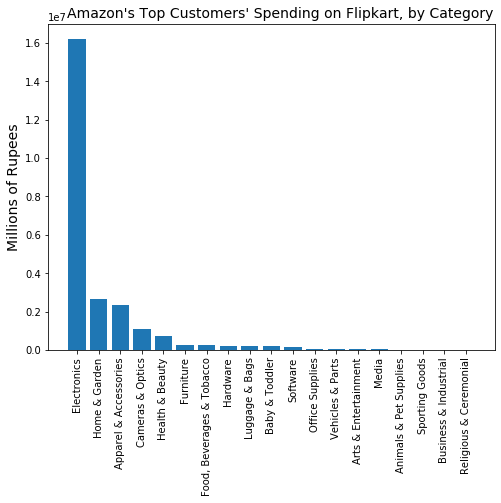

In [1098]:
plt.subplots(figsize=(8, 6))
plt.bar(amazon_top_flip_cat, amazon_top_flip_amount)
plt.xticks(amazon_top_flip_cat, rotation=90)
plt.ylabel("Millions of Rupees", fontsize = 14)
plt.title("    Amazon's Top Customers' Spending on Flipkart, by Category", fontsize = 14)

Text(0.5, 1.0, "    Flipkart's Top Customers' Spending on Amazon, by Category")

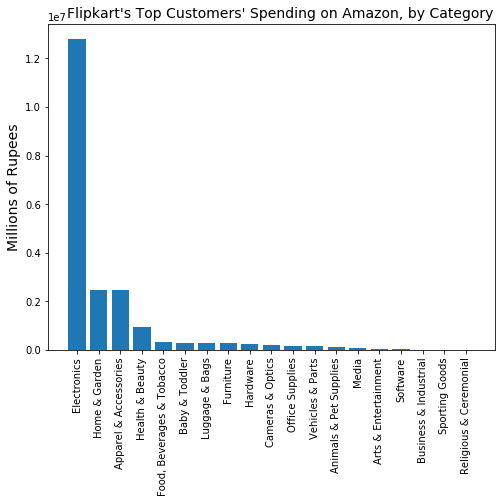

In [1100]:
plt.subplots(figsize=(8, 6))
plt.bar(flip_top_amazon_cat, flip_top_amazon_amount)
plt.xticks(flip_top_amazon_cat, rotation=90)
plt.ylabel("Millions of Rupees", fontsize = 14)
plt.title("    Flipkart's Top Customers' Spending on Amazon, by Category", fontsize = 14)

In [1149]:
#By smaller category

In [1152]:
top_1000_a_from_f_cat = top_1000_amazon.loc[top_1000_amazon["platform"] == "flipkart"].groupby("category").sum().reset_index().sort_values("amount", ascending = False)
top_1000_f_from_a_cat = top_1000_flipkart.loc[top_1000_flipkart["platform"] == "amazon"].groupby("category").sum().reset_index().sort_values("amount", ascending = False)

In [1168]:
a_top_f_cat = list(top_1000_a_from_f_cat.head(20)["category"])
a_top_f_amount = list(top_1000_a_from_f_cat.head(20)["amount"])

f_top_a_cat = list(top_1000_f_from_a_cat.head(20)["category"])
f_top_a_amount = list(top_1000_f_from_a_cat.head(20)["amount"])

In [1179]:
ama_top_flip_amt = pd.Series(a_top_f_amount)/1000000
flip_top_ama_amt = pd.Series(f_top_a_amount)/1000000

In [1302]:
ama_top_flip_amt.sum()

19.972023999999998

In [1303]:
flip_top_ama_amt.sum()

15.38082955

Text(0.5, 1.0, "    Amazon's Top Customers' Spending on Flipkart, by Category")

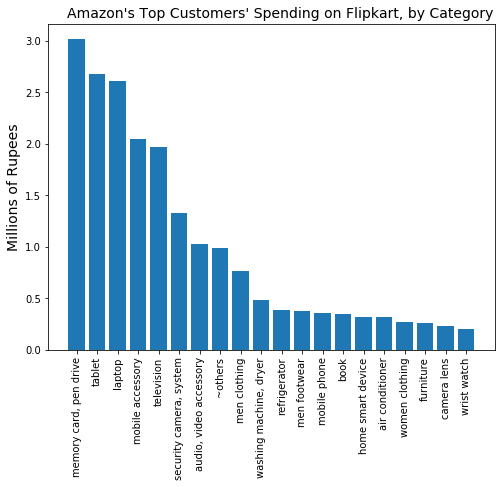

In [1181]:
plt.subplots(figsize=(8, 6))
plt.bar(a_top_f_cat, ama_top_flip_amt)
plt.xticks(a_top_f_cat, rotation=90)
plt.ylabel("Millions of Rupees", fontsize = 14)
plt.title("    Amazon's Top Customers' Spending on Flipkart, by Category", fontsize = 14)

Text(0.5, 1.0, "    Flipkart's Top Customers' Spending on Amazon, by Category")

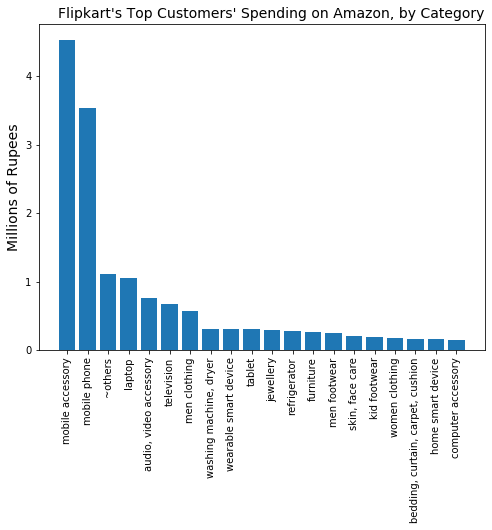

In [1304]:
plt.subplots(figsize=(8, 6))
plt.bar(f_top_a_cat, flip_top_ama_amt)
plt.xticks(f_top_a_cat, rotation=90)
plt.ylabel("Millions of Rupees", fontsize = 14)
plt.title("    Flipkart's Top Customers' Spending on Amazon, by Category", fontsize = 14)

In [ ]:
flipkart